# Titanic Survival Prediction : Import Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Titanic Survival Prediction : Load Dataset

In [28]:
df = pd.read_csv("data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Titanic Survival Prediction : Explore Dataset

In [31]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Titanic Survival Prediction : Handle Missing Values

In [34]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)


# Titanic Survival Prediction : Encode Categorical Features

In [37]:
# Create encoder objects
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Apply encoders
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Preview encoded columns
df[['Sex', 'Embarked']].head()


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


# Titanic Survival Prediction : Select Features

In [55]:
# Create encoder objects
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Apply encoders
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Preview encoded columns
df[['Sex', 'Embarked']].head()


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


# Titanic Survival Prediction : Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shape
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (712, 7)
Test set shape: (179, 7)


# Titanic Survival Prediction : Train Logistic Regression

In [60]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

# Titanic Survival Prediction : Model Evaluation

In [63]:
# Logistic Regression Predictions
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Decision Tree Predictions
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree Accuracy: 0.770949720670391
[[81 24]
 [17 57]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.70      0.77      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



# Titanic Survival Prediction : Feature Importance (Decision Tree)

C:\Users\Raj\AppData\Local\Temp\ipykernel_13052\230179387.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Raj\AppData\Local\Temp\ipykernel_13052\230179387.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


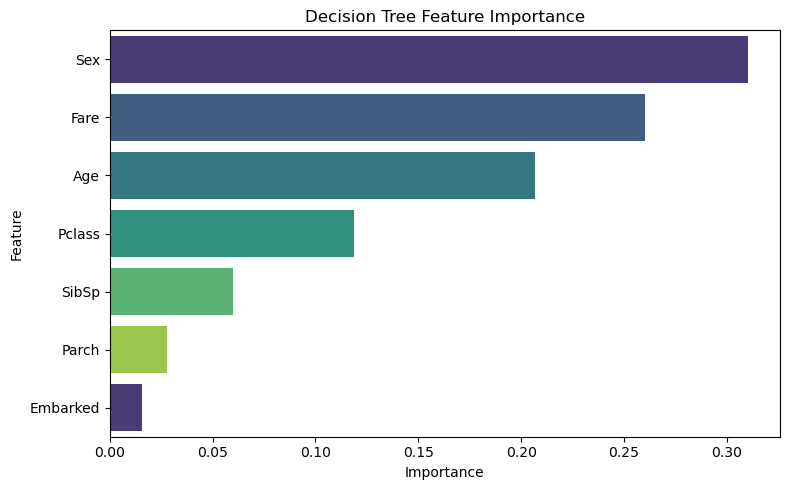

In [76]:
# Get feature importances from the trained Decision Tree model
importances = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=fi_df,
    palette=sns.color_palette('viridis', as_cmap=False)
)
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()


# Titanic Survival Prediction : Conclusion

In [79]:
print("Final Accuracy:")
print(f"  • Logistic Regression: {round(acc_lr * 100, 2)}%")
print(f"  • Decision Tree      : {round(acc_dt * 100, 2)}%")

if acc_dt > acc_lr:
    print("\n Decision Tree performed better on test data.")
else:
    print("\n Logistic Regression performed better on test data.")


Final Accuracy:
  • Logistic Regression: 81.01%
  • Decision Tree      : 77.09%

 Logistic Regression performed better on test data.
